# <center> **Data Analysis Dojo 6 - Analyse des biais ethique**</center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
import os

In [6]:
# Télécharger et extraire le fichier ZIP depuis Kaggle
path = kagglehub.dataset_download("uciml/adult-census-income")

# Trouver le fichier CSV extrait
dataset_folder = os.path.splitext(path)[0]
csv_filename = [f for f in os.listdir(dataset_folder) if f.endswith(".csv")][0]
file_path = os.path.join(dataset_folder, csv_filename)

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(file_path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
pd.set_option('display.max_columns', None)  # Pour afficher toutes les colonnes
pd.set_option('display.width', None)

In [7]:
#nous remplaçons le spoints d'interrogation par la valeur null de numpy
df.replace("?", np.nan, inplace=True)

In [8]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


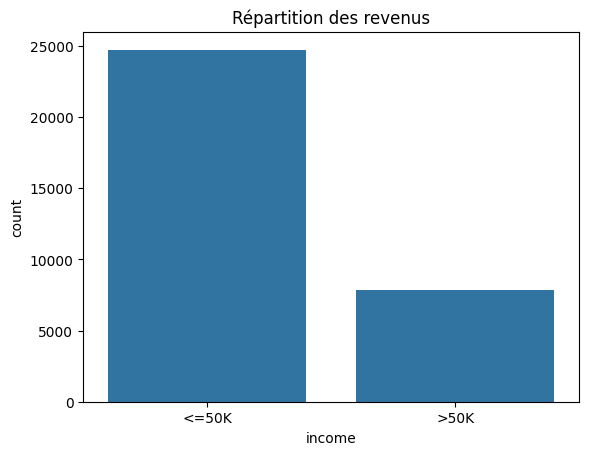

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [11]:
#bar chart de la repartition des revenus
sns.countplot(x='income', data=df)
plt.title('Répartition des revenus')
plt.show()
print(df['income'].value_counts())

Table croisée des proportions de revenus par niveau d'éducation et sexe :
income                  <=50K      >50K
education    sex                       
10th         Female  0.989831  0.010169
             Male    0.907524  0.092476
11th         Female  0.981481  0.018519
             Male    0.930013  0.069987
12th         Female  0.972222  0.027778
             Male    0.899654  0.100346
1st-4th      Female  1.000000  0.000000
             Male    0.950820  0.049180
5th-6th      Female  0.976190  0.023810
             Male    0.943775  0.056225
7th-8th      Female  0.993750  0.006250
             Male    0.919753  0.080247
9th          Female  0.965278  0.034722
             Male    0.940541  0.059459
Assoc-acdm   Female  0.866983  0.133017
             Male    0.676471  0.323529
Assoc-voc    Female  0.866000  0.134000
             Male    0.666667  0.333333
Bachelors    Female  0.790611  0.209389
             Male    0.496253  0.503747
Doctorate    Female  0.418605  0.581395
      

<Figure size 1600x600 with 0 Axes>

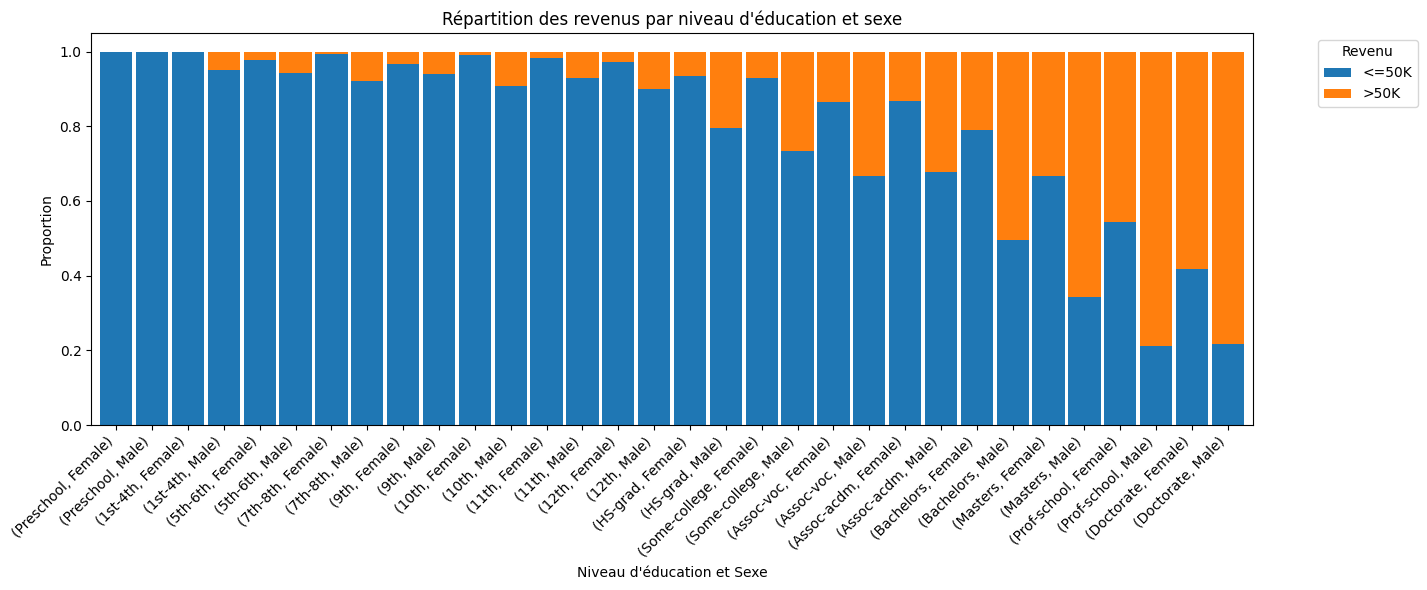

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer la table croisée des proportions de revenus par niveau d'éducation et sexe
sex_education_income = pd.crosstab(
    index=[df['education'], df['sex']],  # Inversez l'ordre : education puis sex
    columns=df['income'],
    normalize='index'
)

# Afficher la table croisée
print("Table croisée des proportions de revenus par niveau d'éducation et sexe :")
print(sex_education_income)

# Réorganiser les niveaux d'éducation en fonction de leur niveau numérique
education_order = df.groupby('education')['education.num'].mean().sort_values().index
sex_education_income = sex_education_income.reindex(
    level='education',
    labels=education_order,
    axis=0
)

# Afficher la table réorganisée
print("\nTable croisée après réorganisation par niveau d'éducation :")
print(sex_education_income)

# Augmenter la taille du graphique dans Colab (si applicable)
plt.rcParams['figure.figsize'] = [16, 6]

# Créer le graphique en barres empilées
plt.figure(figsize=(16, 6))
ax = sex_education_income.plot(
    kind='bar',
    stacked=True,
    width=0.9
)

# Personnalisation du graphique
plt.title("Répartition des revenus par niveau d'éducation et sexe")
plt.xlabel("Niveau d'éducation et Sexe")
plt.ylabel("Proportion")
plt.legend(title="Revenu", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotation des étiquettes de l'axe des X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajustement de la mise en page
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Afficher le graphique
plt.show()


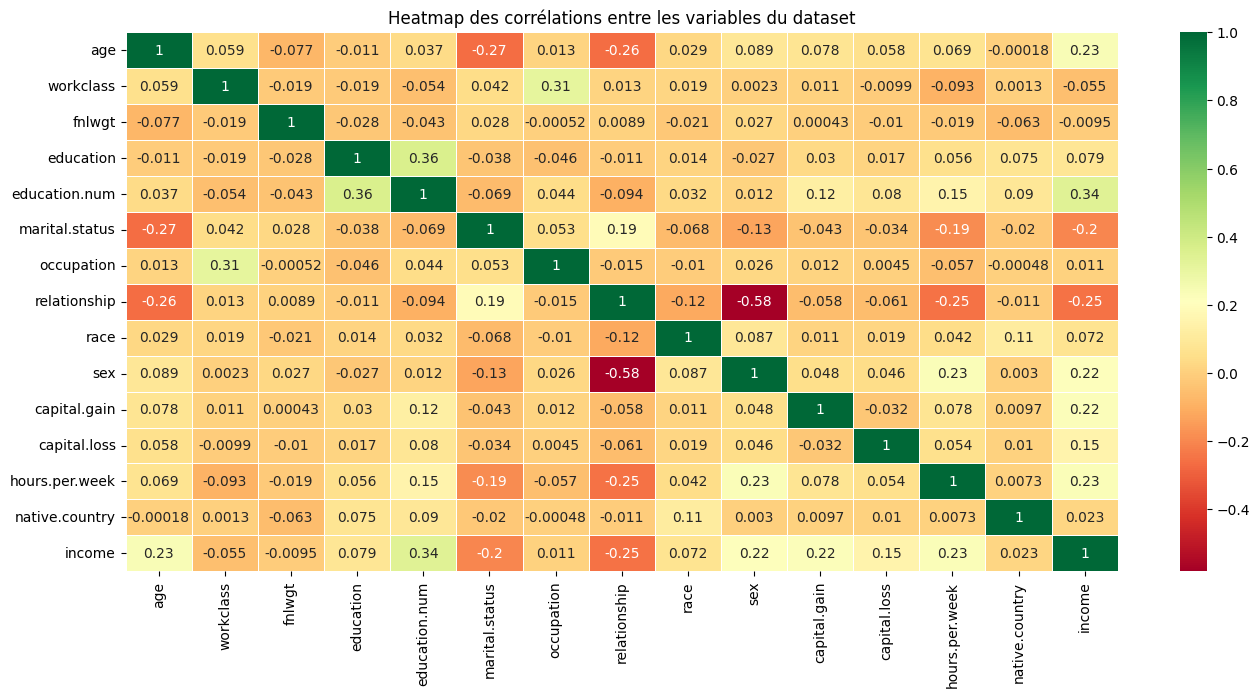

In [9]:
df2 = df.copy()
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = encoder.fit_transform(df[col])

plt.figure(figsize=(16, 7))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title("Heatmap des corrélations entre les variables du dataset")
plt.show()

Aperçu des niveaux d'éducation regroupés :
      education education_grouped
0       HS-grad            Faible
1       HS-grad            Faible
2  Some-college     Intermédiaire
3       7th-8th            Faible
4  Some-college     Intermédiaire

Tableau des comptes des revenus par groupe d'éducation :
income             <=50K  >50K
education_grouped             
Avancée             4158  3909
Faible             12835  1919
Intermédiaire       7727  2013


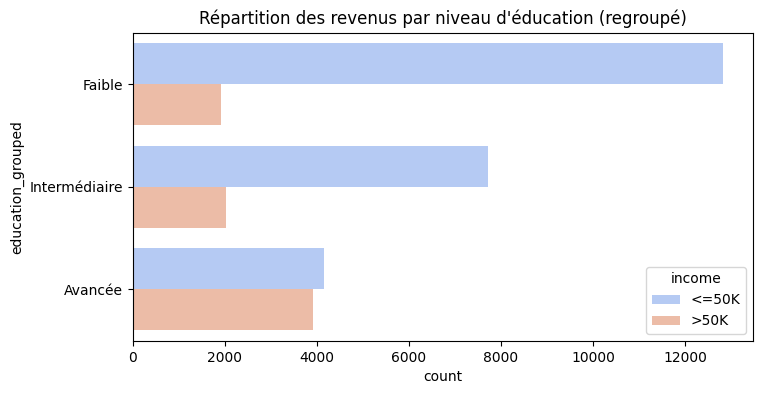

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regrouper les niveaux d'éducation en trois catégories
education_mapping = {
    'Preschool': 'Faible',
    '1st-4th': 'Faible',
    '5th-6th': 'Faible',
    '7th-8th': 'Faible',
    '9th': 'Faible',
    '10th': 'Faible',
    '11th': 'Faible',
    '12th': 'Faible',
    'HS-grad': 'Faible',
    'Some-college': 'Intermédiaire',
    'Assoc-acdm': 'Intermédiaire',
    'Assoc-voc': 'Intermédiaire',
    'Bachelors': 'Avancée',
    'Masters': 'Avancée',
    'Doctorate': 'Avancée',
    'Prof-school': 'Avancée'
}

# Appliquer le mapping aux données
df['education_grouped'] = df['education'].map(education_mapping)

# Afficher les premières lignes de la nouvelle colonne pour vérification
print("Aperçu des niveaux d'éducation regroupés :")
print(df[['education', 'education_grouped']].head())

# Compter le nombre d'occurrences par groupe d'éducation et revenu
education_income_counts = df.groupby(['education_grouped', 'income']).size().unstack()
print("\nTableau des comptes des revenus par groupe d'éducation :")
print(education_income_counts)

# Création du graphique
plt.figure(figsize=(8,4))
sns.countplot(
    y='education_grouped',
    hue='income',
    data=df,
    palette='coolwarm',
    order=['Faible', 'Intermédiaire', 'Avancée']
)

# Personnalisation du graphique
plt.title("Répartition des revenus par niveau d'éducation (regroupé)")

# Afficher le graphique
plt.show()


Nombre total d'hommes et de femmes :
sex
Male      21790
Female    10771
Name: count, dtype: int64

Aperçu des poids attribués :
      sex    weight
0  Female  1.511512
1  Female  1.511512
2  Female  1.511512
3  Female  1.511512
4  Female  1.511512

Tableau des pourcentages pondérés des sexes par niveau d'éducation :
sex               Female       Male
Faible         48.690753  51.309247
Intermédiaire  55.632828  44.367172
Avancée        45.148696  54.851304


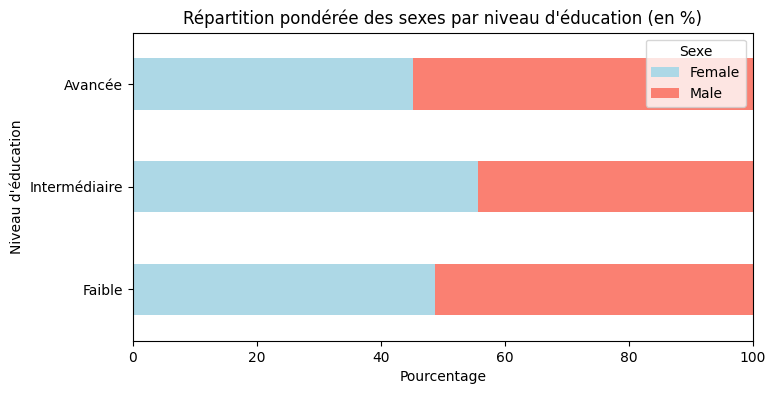

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcul du nombre total d'hommes et de femmes
gender_counts = df['sex'].value_counts()
total = len(df)

# Affichage du nombre total d'hommes et de femmes
print("Nombre total d'hommes et de femmes :")
print(gender_counts)

# Calcul des poids pour équilibrer la distribution
weights = total / (2 * gender_counts)
df['weight'] = df['sex'].map(weights)

# Affichage des premiers poids calculés
print("\nAperçu des poids attribués :")
print(df[['sex', 'weight']].head())

# Calcul de la distribution pondérée des sexes par groupe d'éducation
edu_sex_counts_weighted = pd.DataFrame()

for edu_level in df['education_grouped'].unique():
    mask = df['education_grouped'] == edu_level
    weighted_counts = df[mask].groupby('sex')['weight'].sum()
    percentages = (weighted_counts / weighted_counts.sum()) * 100
    edu_sex_counts_weighted[edu_level] = percentages

# Transposer pour obtenir un format lisible
edu_sex_counts_weighted = edu_sex_counts_weighted.T

# Affichage du tableau des pourcentages
print("\nTableau des pourcentages pondérés des sexes par niveau d'éducation :")
print(edu_sex_counts_weighted)

# Création du graphique
plt.figure(figsize=(8, 4))
edu_sex_counts_weighted.loc[['Faible', 'Intermédiaire', 'Avancée']].plot(
    kind="barh", stacked=True, color=['lightblue', 'salmon'], ax=plt.gca()
)

# Ajout du titre et des labels
plt.title("Répartition pondérée des sexes par niveau d'éducation (en %)")
plt.xlabel("Pourcentage")
plt.ylabel("Niveau d'éducation")
plt.legend(title="Sexe")
plt.xlim(0, 100)

# Affichage du graphique
plt.show()


Tableau des effectifs par sexe et niveau de revenu :
income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662


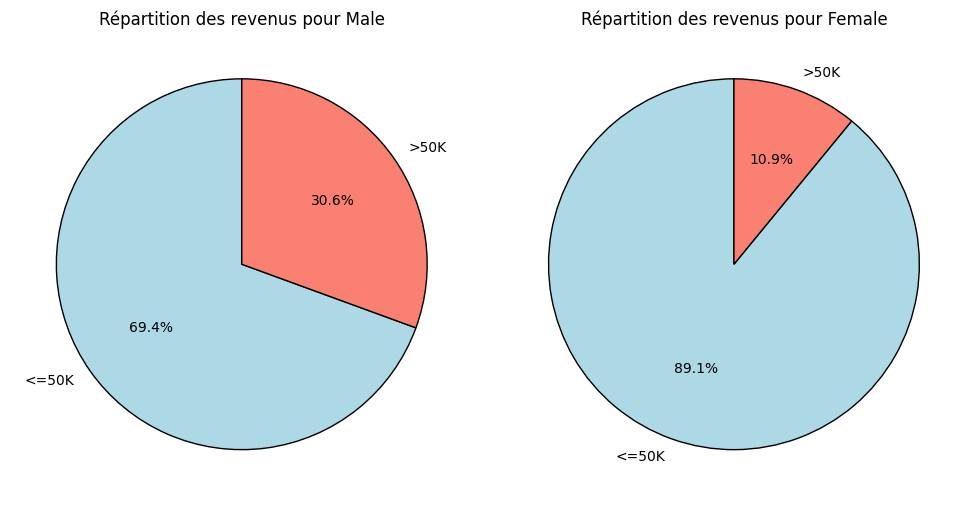

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Compter le nombre de personnes par 'sex' et 'income'
data_pie = df.groupby(["sex", "income"]).size().unstack()

# Affichage des données utilisées pour les pie charts
print("Tableau des effectifs par sexe et niveau de revenu :")
print(data_pie)

# Création des pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Couleurs pour les camemberts
colors = ['lightblue', 'salmon']

# Boucle pour créer un camembert par sexe
for i, sex in enumerate(["Male", "Female"]):
    if sex in data_pie.index:  # Vérifier si le sexe est présent dans les données
        axes[i].pie(
            data_pie.loc[sex],  # Récupérer les valeurs pour ce sexe
            labels=data_pie.columns,  # Labels des catégories de revenus
            autopct='%1.1f%%',  # Afficher les pourcentages
            colors=colors,
            startangle=90,  # Angle de départ pour une meilleure lisibilité
            wedgeprops={'edgecolor': 'black'}  # Bordures pour plus de clarté
        )
        axes[i].set_title(f"Répartition des revenus pour {sex}")

# Ajustement de la disposition
plt.tight_layout()

# Affichage du graphique
plt.show()


Tableau des effectifs par ethnie et niveau de revenu :
income              <=50K  >50K
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117

Tableau des pourcentages de revenus par ethnie :
income                  <=50K       >50K
race                                    
Amer-Indian-Eskimo  88.424437  11.575563
Asian-Pac-Islander  73.435996  26.564004
Black               87.612036  12.387964
Other               90.774908   9.225092
White               74.414006  25.585994


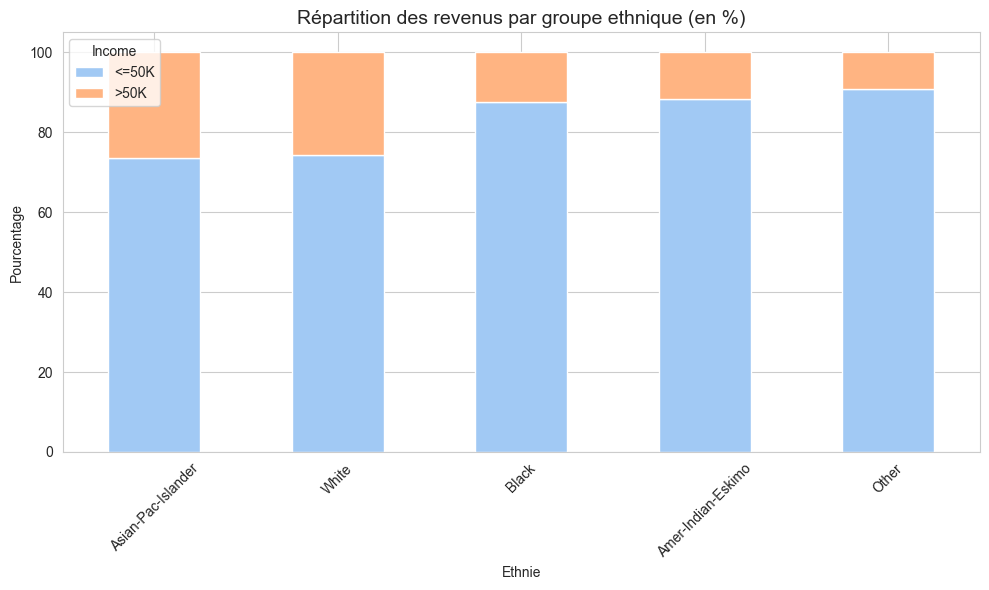

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer un style et une palette pour la visualisation
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Calcul des effectifs par ethnie et revenu
income_race_counts = df.groupby(['race', 'income']).size().unstack()

# Affichage des effectifs bruts
print("Tableau des effectifs par ethnie et niveau de revenu :")
print(income_race_counts)

# Conversion en pourcentage
income_race_percent = income_race_counts.div(income_race_counts.sum(axis=1), axis=0) * 100

# Affichage des pourcentages
print("\nTableau des pourcentages de revenus par ethnie :")
print(income_race_percent)

# Trier les ethnies en fonction du pourcentage de personnes gagnant '>50K'
income_race_percent = income_race_percent.sort_values(by='>50K', ascending=False)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))
income_race_percent.plot(kind='bar', stacked=True, ax=ax)

# Personnalisation du graphique
ax.set_title("Répartition des revenus par groupe ethnique (en %)", fontsize=14)
ax.set_xlabel("Ethnie")
ax.set_ylabel("Pourcentage")
ax.legend(title="Income")
ax.tick_params(axis='x', rotation=45)

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()


Tableau des effectifs par ethnie et niveau d'éducation :
education_grouped   Avancée  Faible  Intermédiaire
race                                              
Amer-Indian-Eskimo       31     174            106
Asian-Pac-Islander      446     318            275
Black                   442    1717            965
Other                    46     160             65
White                  7102   12385           8329

Tableau des pourcentages par ethnie et niveau d'éducation :
education_grouped     Avancée     Faible  Intermédiaire
race                                                   
Amer-Indian-Eskimo   9.967846  55.948553      34.083601
Asian-Pac-Islander  42.925890  30.606352      26.467757
Black               14.148528  54.961588      30.889885
Other               16.974170  59.040590      23.985240
White               25.532068  44.524734      29.943198


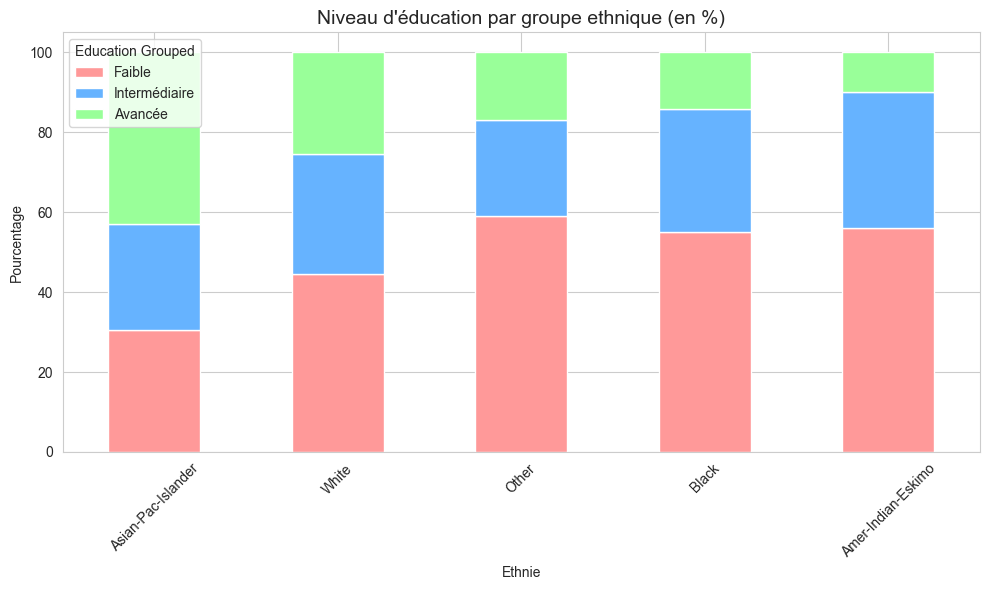

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des effectifs par ethnie et niveau d'éducation
education_race_counts = df.groupby(['race', 'education_grouped']).size().unstack()

# Affichage des effectifs bruts
print("Tableau des effectifs par ethnie et niveau d'éducation :")
print(education_race_counts)

# Conversion en pourcentage
education_race_percent = education_race_counts.div(education_race_counts.sum(axis=1), axis=0) * 100

# Affichage des pourcentages
print("\nTableau des pourcentages par ethnie et niveau d'éducation :")
print(education_race_percent)

# Réorganiser les catégories pour avoir 'Avancée' en haut, 'Intermédiaire' au milieu et 'Faible' en bas
education_race_percent = education_race_percent[['Faible', 'Intermédiaire', 'Avancée']]

# Trier les ethnies en fonction du pourcentage d'Avancée
education_race_percent = education_race_percent.sort_values(by='Avancée', ascending=False)

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))
education_race_percent.plot(kind='bar', stacked=True, ax=ax, color=["#FF9999", "#66B3FF", "#99FF99"])

# Personnalisation du graphique
ax.set_title("Niveau d'éducation par groupe ethnique (en %)", fontsize=14)
ax.set_xlabel("Ethnie")
ax.set_ylabel("Pourcentage")
ax.legend(title="Education Grouped")
ax.tick_params(axis='x', rotation=45)

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()


axe d'amélioration, utiliser la colonne FNLWGT" (Final Weight), un coéfficient de pondération